# Validation through shuffled heterogeneous gradients

In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap
from turbo_colormap import *
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [2]:
# First Import the runs:

#Best = glob.glob("D:\Simulations\LCHetVal_Better\*Best*.csv")
#Best = glob.glob(r"D:\Simulations\2020_12_15\*Best*.csv")
Best = glob.glob(r"D:\Simulations\2021_01_06\*Best*.csv")
#Best = glob.glob(r"D:\Simulations\2021_01_21\*Best*.csv")

In [3]:
Score = []
G = []
Sigma = []

for item in Best:
    a = np.genfromtxt(item)
    Score.append(a[0])
    G.append(a[1])
    Sigma.append(a[2])

In [4]:
df = pd.DataFrame({"Score":Score,"G":G,"Sigma":Sigma})
df = df.sort_values(by="Score")

df

,Score,G,Sigma
0,0.553166,0.7,0.0
71,0.553166,0.7,0.0
67,0.553166,0.7,0.0
66,0.553166,0.7,0.0
62,0.553166,0.7,0.0
...,...,...,...
14,0.624465,0.7,0.8
64,0.626699,0.7,0.4
18,0.641523,0.7,0.4
65,0.661962,0.7,0.4


In [5]:
# Select Rows whose column values equals a scalar 
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

Sigma_0 = df.loc[df['Sigma'] == 0.0]["Score"]
Sigma_02 = df.loc[df['Sigma'] == 0.2]["Score"]
Sigma_04 = df.loc[df['Sigma'] == 0.4]["Score"]
Sigma_06 = df.loc[df['Sigma'] == np.arange(start=0,stop=1,step=0.2)[4]]["Score"]
Sigma_08 = df.loc[df['Sigma'] == 0.8]["Score"]
Sigma_1 = df.loc[df['Sigma'] == 1.0]["Score"]

Text(0.5, 0, 'Sigma')

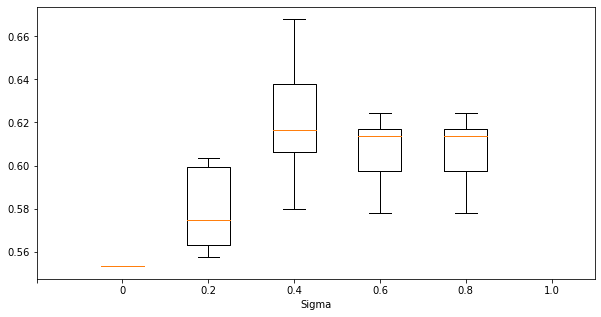

In [6]:
plt.boxplot([Sigma_0,Sigma_02,Sigma_04,Sigma_06,Sigma_08,Sigma_1])
plt.xticks([0, 1, 2, 3, 4,5,6],["","0", "0.2", "0.4", "0.6", "0.8","1.0"])
plt.xlabel("Sigma")

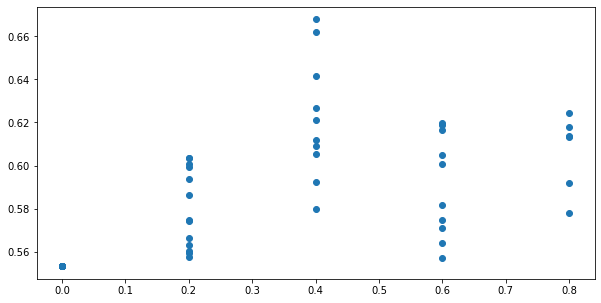

In [7]:
plt.scatter(Sigma,Score)

(array([61.,  0., 13.,  0.,  0., 10.,  0., 10.,  0.,  6.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ]),
 <a list of 10 Patch objects>)

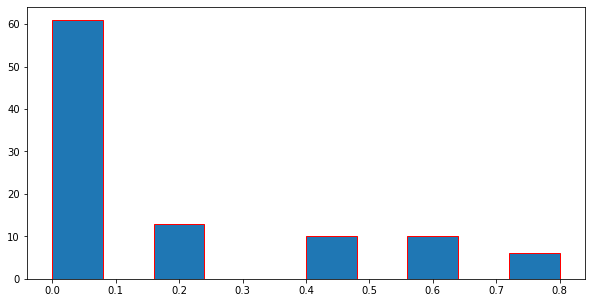

In [8]:
plt.hist(Sigma,edgecolor='red')

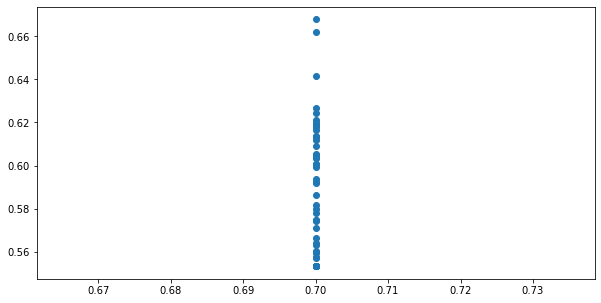

In [9]:
plt.scatter(G,Score)

Text(0.5, 0, 'Max FC-FC Score')

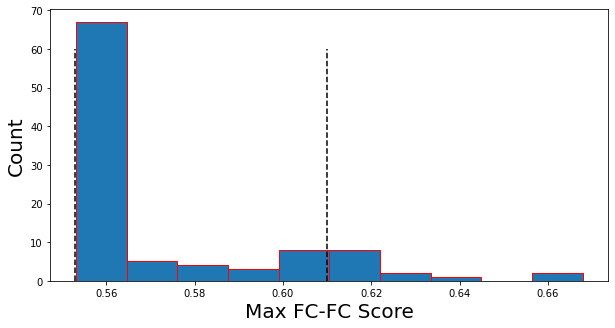

In [10]:
plt.hist(Score,edgecolor='red',)
plt.vlines(x=0.553,ymin=0,ymax=60,color='k',linestyles='dashed')
plt.vlines(x=0.61,ymin=0,ymax=60,color='k',linestyles='dashed')
plt.ylabel("Count", fontsize=20)
plt.xlabel("Max FC-FC Score", fontsize=20)
#plt.grid()

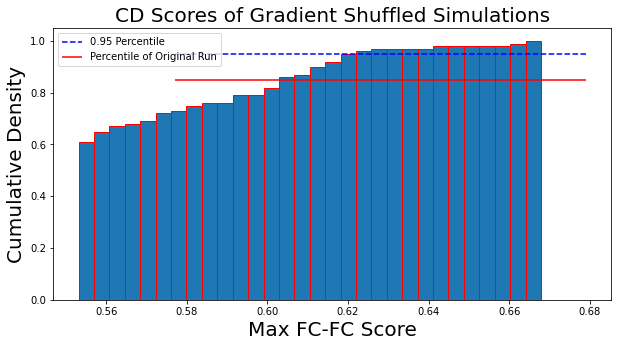

In [11]:
plt.hist(Score,cumulative=True,density=True,edgecolor='red',bins=30)
plt.hlines(y=0.95,xmin=0.577,xmax=0.679,color='b',linestyles='dashed')
plt.hlines(y=0.85,xmin=0.577,xmax=0.679,color='r',linestyles='solid')
plt.title("CD Scores of Gradient Shuffled Simulations", fontsize=20)
plt.ylabel("Cumulative Density", fontsize=20)
plt.xlabel("Max FC-FC Score", fontsize=20)
plt.legend(("0.95 Percentile","Percentile of Original Run"))
#plt.grid()

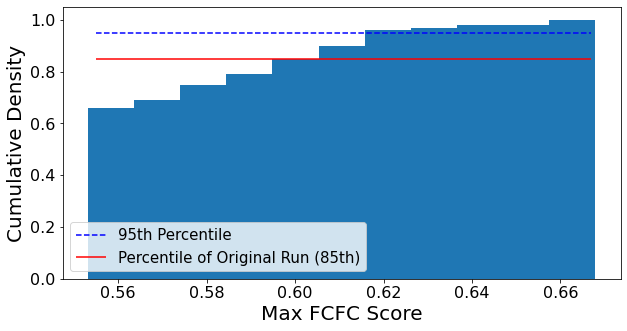

In [27]:
plt.hist(Score,cumulative=True,density=True,bins=11,)
plt.hlines(y=0.95,xmin=0.555,xmax=0.667,color='b',linestyles='dashed')
plt.hlines(y=0.85,xmin=0.555,xmax=0.667,color='r',linestyles='solid')
#plt.title("CD Scores of Gradient Shuffled Simulations", fontsize=20)
plt.ylabel("Cumulative Density", fontsize=20)
plt.xlabel("Max FCFC Score", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(("95th Percentile","Percentile of Original Run (85th)"),loc=3,prop={'size': 15})
#plt.grid()

plt.savefig("do-not-track\\" + "ShuffleSimsNoG.pdf",bbox_inches='tight')
plt.show()